In [153]:
import numpy as np
import matplotlib.pyplot as plt

In [154]:
sample_freq = 44100
abtast_interval = 1/sample_freq

In [155]:
def read_audio(file: str):
    data = np.load(file)
    return data / 1e8

(112640,)
0.20070724899122902


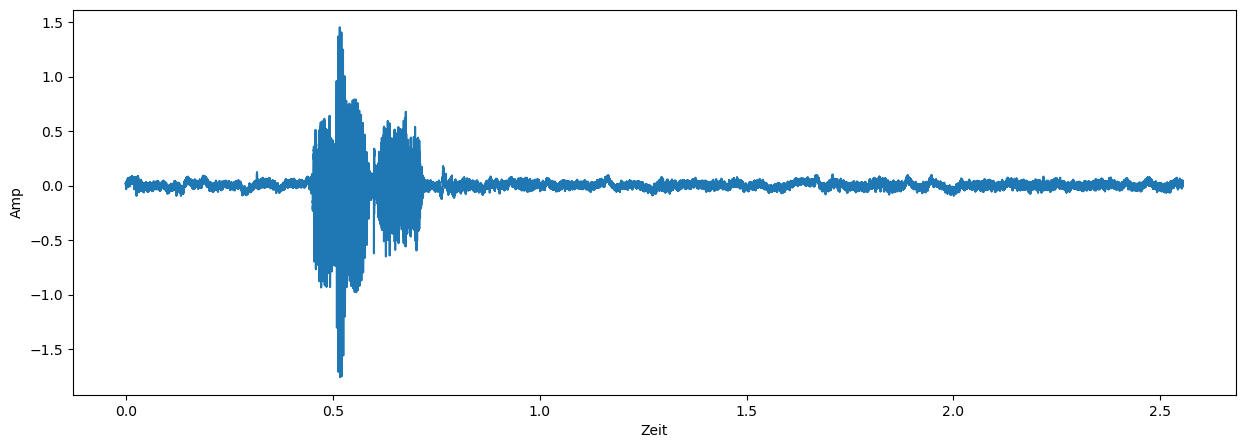

In [156]:
audio_file = "./aufnahme/kevin/links/2023-06-05_15-35-04.npy"
test_signal = read_audio(audio_file)
print(test_signal.shape)

fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylabel("Amp")
ax.set_xlabel("Zeit")

ax.plot(np.linspace(0,len(test_signal)/sample_freq,num=len(test_signal)), test_signal)

cutoff_point = np.std(test_signal) * 1.7
print(cutoff_point)

In [157]:
def read_audio(file: str):
    data = np.load(file)
    cutoff_point = np.std(data) * 2.2
    start_index = np.argmax((data > cutoff_point) | (data < -cutoff_point))
    end_index = start_index + sample_freq # 44100 sample freq
    return data[start_index:end_index] / 1e8

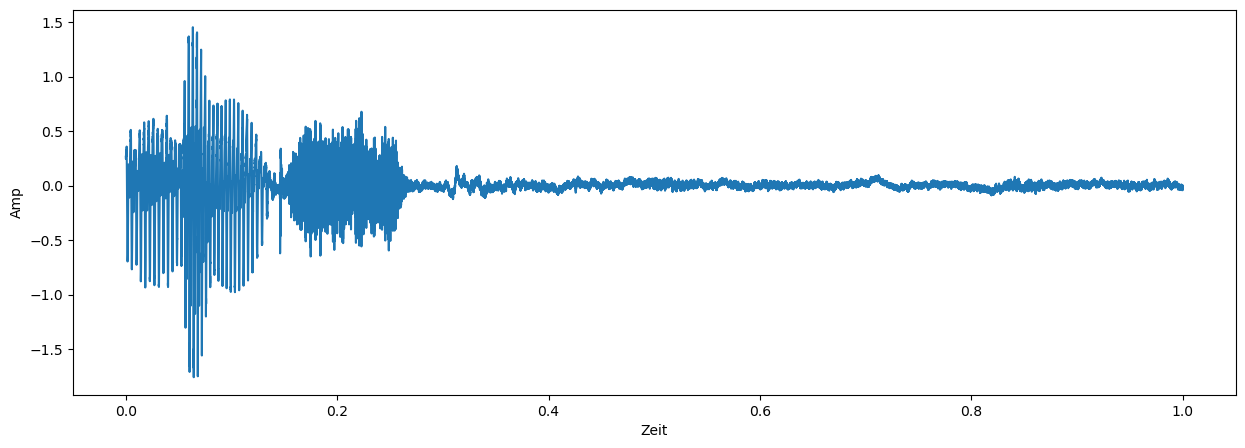

In [158]:
cut = read_audio(audio_file)

fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylabel("Amp")
ax.set_xlabel("Zeit")
ax.plot(np.linspace(0, 1, num=sample_freq), cut)

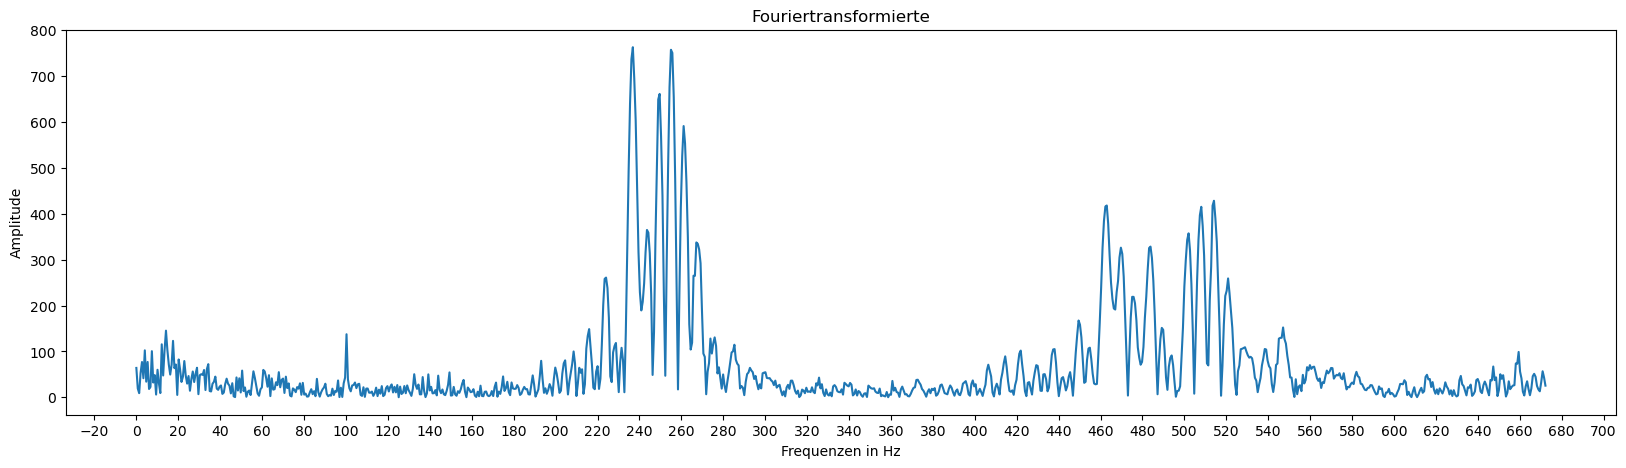

In [159]:
next_best_size = 2 ** int(np.ceil(np.log2(cut.size)))
F = np.fft.fft(cut, next_best_size)
freq = np.fft.fftfreq(next_best_size, d=abtast_interval)


fig, axl = plt.subplots(figsize=(20, 5))

freqc = freq[:1000]
Fc = F.real[:1000]
axl.set_title("Fouriertransformierte")
axl.set_xlabel("Frequenzen in Hz")
axl.set_ylabel("Amplitude")
axl.locator_params(axis="x", nbins=40)
axl.plot(freqc, np.abs(Fc))